# COM6031 CW1 

## Scenario 2 (Insurance Premium Simulation) - Observer Pattern
In this scenario the **observer pattern** will be used to implement a simple **insurance premium simulation**.

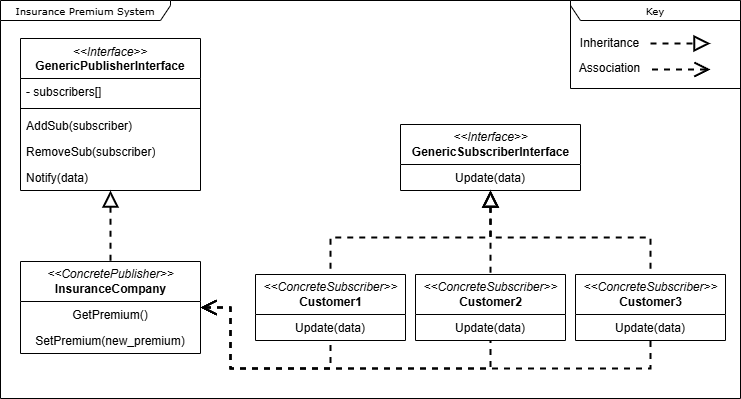

It consists of **two generic interfaces**: a **publisher**, and a **subscriber** interface. The **publisher interface** defines methods for **adding and removing subscribers** to a private subscriber list. It **also** defines a method to **notify all subscribers of a change/update**. The **subscriber interface** defines an **‘Update’ method** designed to be overridden by child classes which **provide unique functionality** dependent on the updated value passed to it from the event provider.

The publisher interface has one concrete implementation acting as the insurance premium provider, and the subscriber interface has three concrete implementations with the ‘Update’ method being overridden in each one to provide a unique response.


## Interfaces

### Generic Publisher Interface (Subject)

In [6]:
class GenericPublisherInterface():
    """Generic Publisher Interface responsible for managing and notifying subscribers
    """
    def __init__(self):
        self._subscribers = [] # Initialise empty subscribers array

    def AddSub(self, subscriber):
        """Add subscriber to list of subscribers

        Args:
            subscriber (GenericSubscriberInterface): Subscriber to be added to list of subscribers.
        """
        self._subscribers.append(subscriber)        # Append subscriber to subscribers array
        print(f'Added Subscriber: {subscriber}')    # Print feedback to the console

    def RemoveSub(self, subscriber):
        """Remove subscriber from list of subscribers

        Args:
            subscriber (GenericSubscriberInterface): Subscriber to be removed from list of subscribers
        """
        self._subscribers.remove(subscriber)        # Remove subscriber from subscribers array
        print(f'Removed Subscriber: {subscriber}')  # Print feedback to console

    def Notify(self, data):
        """Notify subscribers of data change

        Args:
            data (object): New data to update subscribers with.
        """
        for subscriber in self._subscribers:   # Loop over every current subscribed entity
            subscriber.Update(data)            # Call subscriber's Update function with new data

### Generic Subscriber Interface (Observer)

In [7]:

class GenericSubscriberInterface():
    """Generic Subscriber Interface for overriding
    """
    def Update(self, data):
        """Generic Update function to be overriden with child-specific functionality

        Args:
            data (object): New data passed from event provider to this object
        """
        pass

## Concrete Implementations

### Concrete Insurance Premium Model

In [8]:
class InsuranceCompany(GenericPublisherInterface):
    """Concrete implementation of publisher. Insurance company responsible for controlling insurance premiums and notifying customers/subscribers
    """
    def __init__(self, premium):
        super().__init__()          # Initialise subscribers array from parent class
        self._premium = premium     # Initialise insurance premium

    def GetPremium(self):
        """Get current insurance premium

        Returns:
            float: Current insurance premium
        """     
        return self._premium    # Return current insurance premium

    def SetPremium(self, new_premium):
        """Set new insurance premium and notify client/subscribers

        Args:
            new_premium (float): New insurance premium
        """
        print(f'\nSetting Insurance Premium to: {new_premium}')     # Print feedback to console
        self._premium = new_premium                                 # Set new insurance premium
        self.Notify(self._premium)                                  # Notify customers/subscribers

### Concrete Customer Implementations

In [9]:
class Customer1(GenericSubscriberInterface):
    """Concrete implementation of subscriber. Customer with unique response to updates to insurance premium.
    """
    def Update(self, new_premium):
        """Unique implementation of Update function with response that is unique to this customer

        Args:
            new_premium (float): New insurance premium received
        """
        if(new_premium > 100):
            print("Customer 1: This new insurance premium is unacceptable")
        else:
            print("Customer 1: This is an acceptable new insurance premium")

class Customer2(GenericSubscriberInterface):
    """Concrete implementation of subscriber. Customer with unique response to updates to insurance premium.
    """
    def Update(self, new_premium):
        """Unique implementation of Update function with response that is unique to this customer

        Args:
            new_premium (float): New insurance premium received
        """
        if(new_premium > 150):
            print("Customer 2: This new insurance premium is unacceptable")
        else:
            print("Customer 2: This is an acceptable new insurance premium")

class Customer3(GenericSubscriberInterface):
    """Concrete implementation of subscriber. Customer with unique response to updates to insurance premium.
    """
    def Update(self, new_premium):
        """Unique implementation of Update function with response that is unique to this customer

        Args:
            new_premium (float): New insurance premium received
        """
        if(new_premium > 200):
            print("Customer 3: This new insurance premium is unacceptable")
        else:
            print("Customer 3: This is an acceptable new insurance premium")

### Example

In [11]:
if __name__ == "__main__":
    evil_insurance = InsuranceCompany(80)                           # Create insurance company 'evil_insurance' with initial insurance premium of 80
    c1 = Customer1()                                                # Create instance of Customer1 ('c1')
    c2 = Customer2()                                                # Create instance of Customer2 ('c2')
    c3 = Customer3()                                                # Create instance of Customer3 ('c3')
    evil_insurance.AddSub(c1)                                       # Add 'c1' to 'evil_insurance' subscriber list
    evil_insurance.AddSub(c2)                                       # Add 'c2' to 'evil_insurance' subscriber list
    evil_insurance.AddSub(c3)                                       # Add 'c3' to 'evil_insurance' subscriber list
    print(f'Current Insurance: {evil_insurance.GetPremium()}')      # Print current insurance premium
    evil_insurance.SetPremium(90)                                   # Set new premium, subscribed customers will respond with their unique response
    evil_insurance.SetPremium(110)                                  # ... more unique responses to changing premium
    evil_insurance.SetPremium(160)                                  # ... more unique responses to changing premium
    evil_insurance.SetPremium(210)                                  # ... more unique responses to changing premium
    evil_insurance.RemoveSub(c2)                                    # Remove 'c2' from 'evil_insurance' subscriber list
    evil_insurance.SetPremium(140)                                  # Set new premium, expecting one less response than previous responses given 'c2' is no longer subscribed

Added Subscriber: <__main__.Customer1 object at 0x000001D32EFECD10>
Added Subscriber: <__main__.Customer2 object at 0x000001D32E2A4FE0>
Added Subscriber: <__main__.Customer3 object at 0x000001D32EFEF200>
Current Insurance: 80

Setting Insurance Premium to: 90
Customer 1: This is an acceptable new insurance premium
Customer 2: This is an acceptable new insurance premium
Customer 3: This is an acceptable new insurance premium

Setting Insurance Premium to: 110
Customer 1: This new insurance premium is unacceptable
Customer 2: This is an acceptable new insurance premium
Customer 3: This is an acceptable new insurance premium

Setting Insurance Premium to: 160
Customer 1: This new insurance premium is unacceptable
Customer 2: This new insurance premium is unacceptable
Customer 3: This is an acceptable new insurance premium

Setting Insurance Premium to: 210
Customer 1: This new insurance premium is unacceptable
Customer 2: This new insurance premium is unacceptable
Customer 3: This new ins